
# Premier Project: Water Quality Prediction

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling/Cleaning</a></li>
<li><a href="#---">Exploratory Data Analysis</a></li>
<li><a href="#---">----------</a></li>
<li><a href="#---">----------</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
 
> The dataset to investigate and make predictions on contains information about ............ Each column is described below:

1. pH value: PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards. 

2. Hardness: Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS): Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines: Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate: Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity: Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon: Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes: THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity: The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability: Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.


### Question(s) for Analysis




In [28]:
# import libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling
> In this section, the dataset is loaded into a dataframe for analysis and modelling in the notebook with the pd.read_csv() function. Then few lines of the dataset is displayed with .head() function to make sure the data file was correctly read and also to get the idea of what the data looks like.


In [29]:
# load dataset into a dataframe
df = pd.read_csv('water_potability.csv')

In [30]:
# check if the dataset was read properly
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [31]:
# check for the number of rows and columns in the dataframe
df.shape

(3276, 10)

In [32]:
# check for information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [33]:
# check for columns with null values
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [34]:
# check for duplicates in the dataset
df.duplicated().sum()

0

### Data Cleaning

> The **data cleaning** will begin with checking and fixing the shape of dataset, duplicates, data types of the columns and finally dropping columns that are not needed for analysis and prediction.

#### Handling Missing Values

In [35]:
# create a function to handle the missing values in the dataset
def fill_missing(column):
    '''
    function to replace the missing values in the dataset with the mean values of the column
    -------------------PARAMETER--------------------------
   column: feature/variable containing the missing value
    '''
    return column.fillna(column.mean())

In [36]:
# list the columns with missing values
columns = ['ph', 'Sulfate', 'Trihalomethanes']
# iterate through the list fill null values in each item of the list
for col in columns:
    df[col] = fill_missing(df[col])
    

In [37]:
# test for the change
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [38]:
# check the statistical summary of the dataframe
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.469956    32.879761   8768.570828     1.583085    36.142612   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.080795   196.967627  20927.833607     7.130299   333.775777   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        15.769881     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        56.647656     3.439711     0.000000  
50%      421.884968       14.218338        66.396293     3.955028     0.000000  
75%      481.792304       16.557652        76.666609     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

- No duplicate is present
- missing values in the columns have been replaced with the mean of the values in the column
- All columns have a correct data type and there's no need for further conversions  

<a id='eda'></a>
## Exploratory Data Analysis 
> Now that the dataset has been wrangled and cleaned, let's begin the analysis of the dataset by first checking the visual summaries of the dataset using .hist() function and then finally exploring the questions posed at the <a href="#intro">Introduction</a>.


In [39]:
# eda part starts over here we will use some libraries to plot some graphs to visualize the dataset.

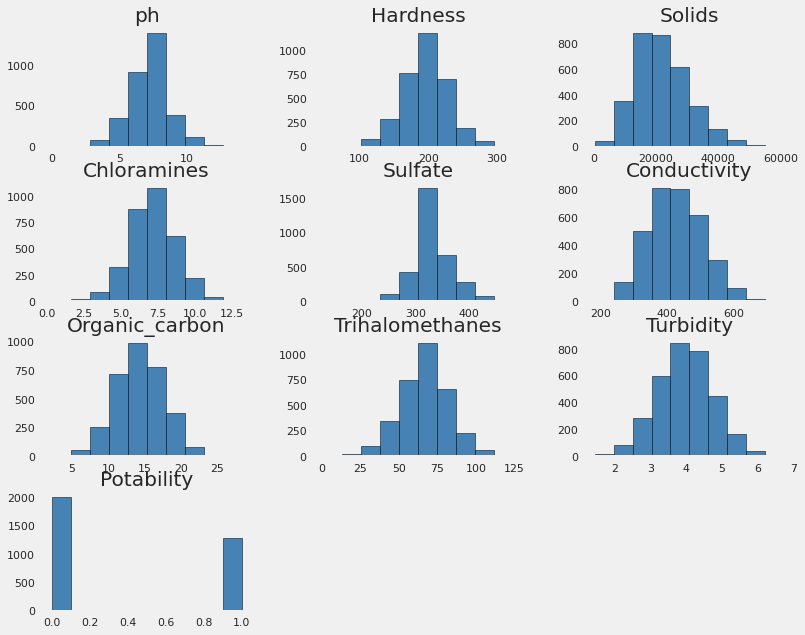

In [40]:
df.hist(grid = False, color = 'steelblue', edgecolor = 'black', figsize = (12,10));

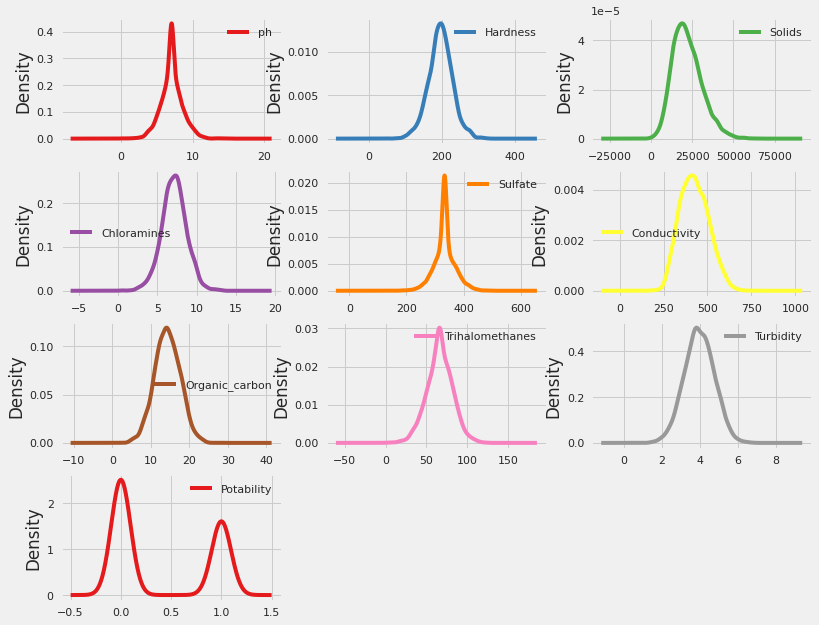

In [41]:
# density chart of the features
df.plot(kind="density", subplots=True, layout=(4,3), sharex=False, figsize=(12, 10))
plt.show()

In [42]:
!pip install autoviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

Shape of your Data Set loaded: (3276, 10)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  9
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    10 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 45
All Plots done
Time to run AutoViz = 5 seconds 

 ##########

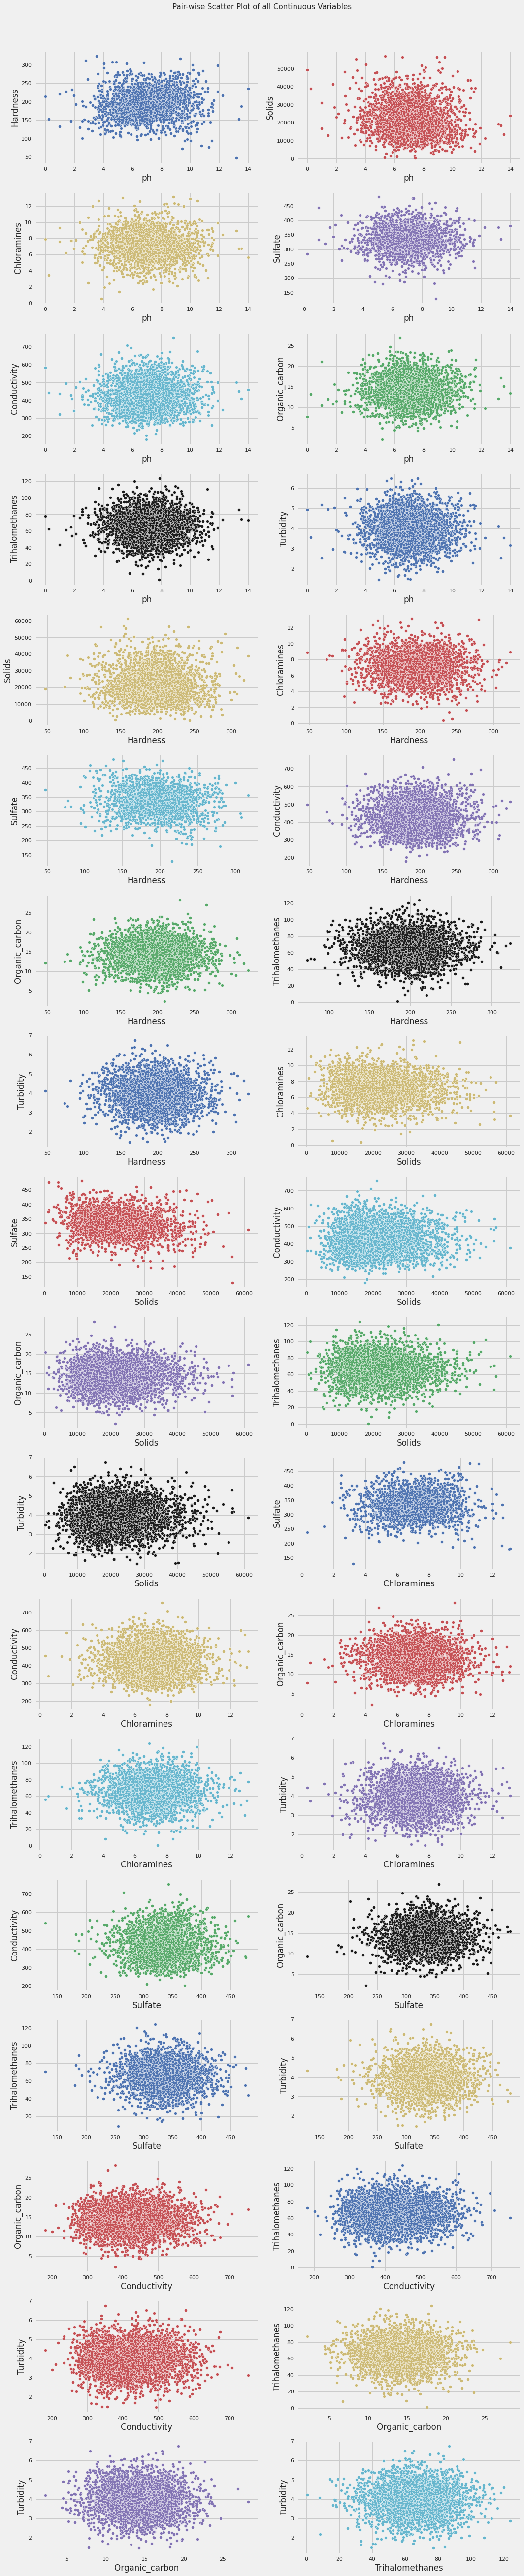

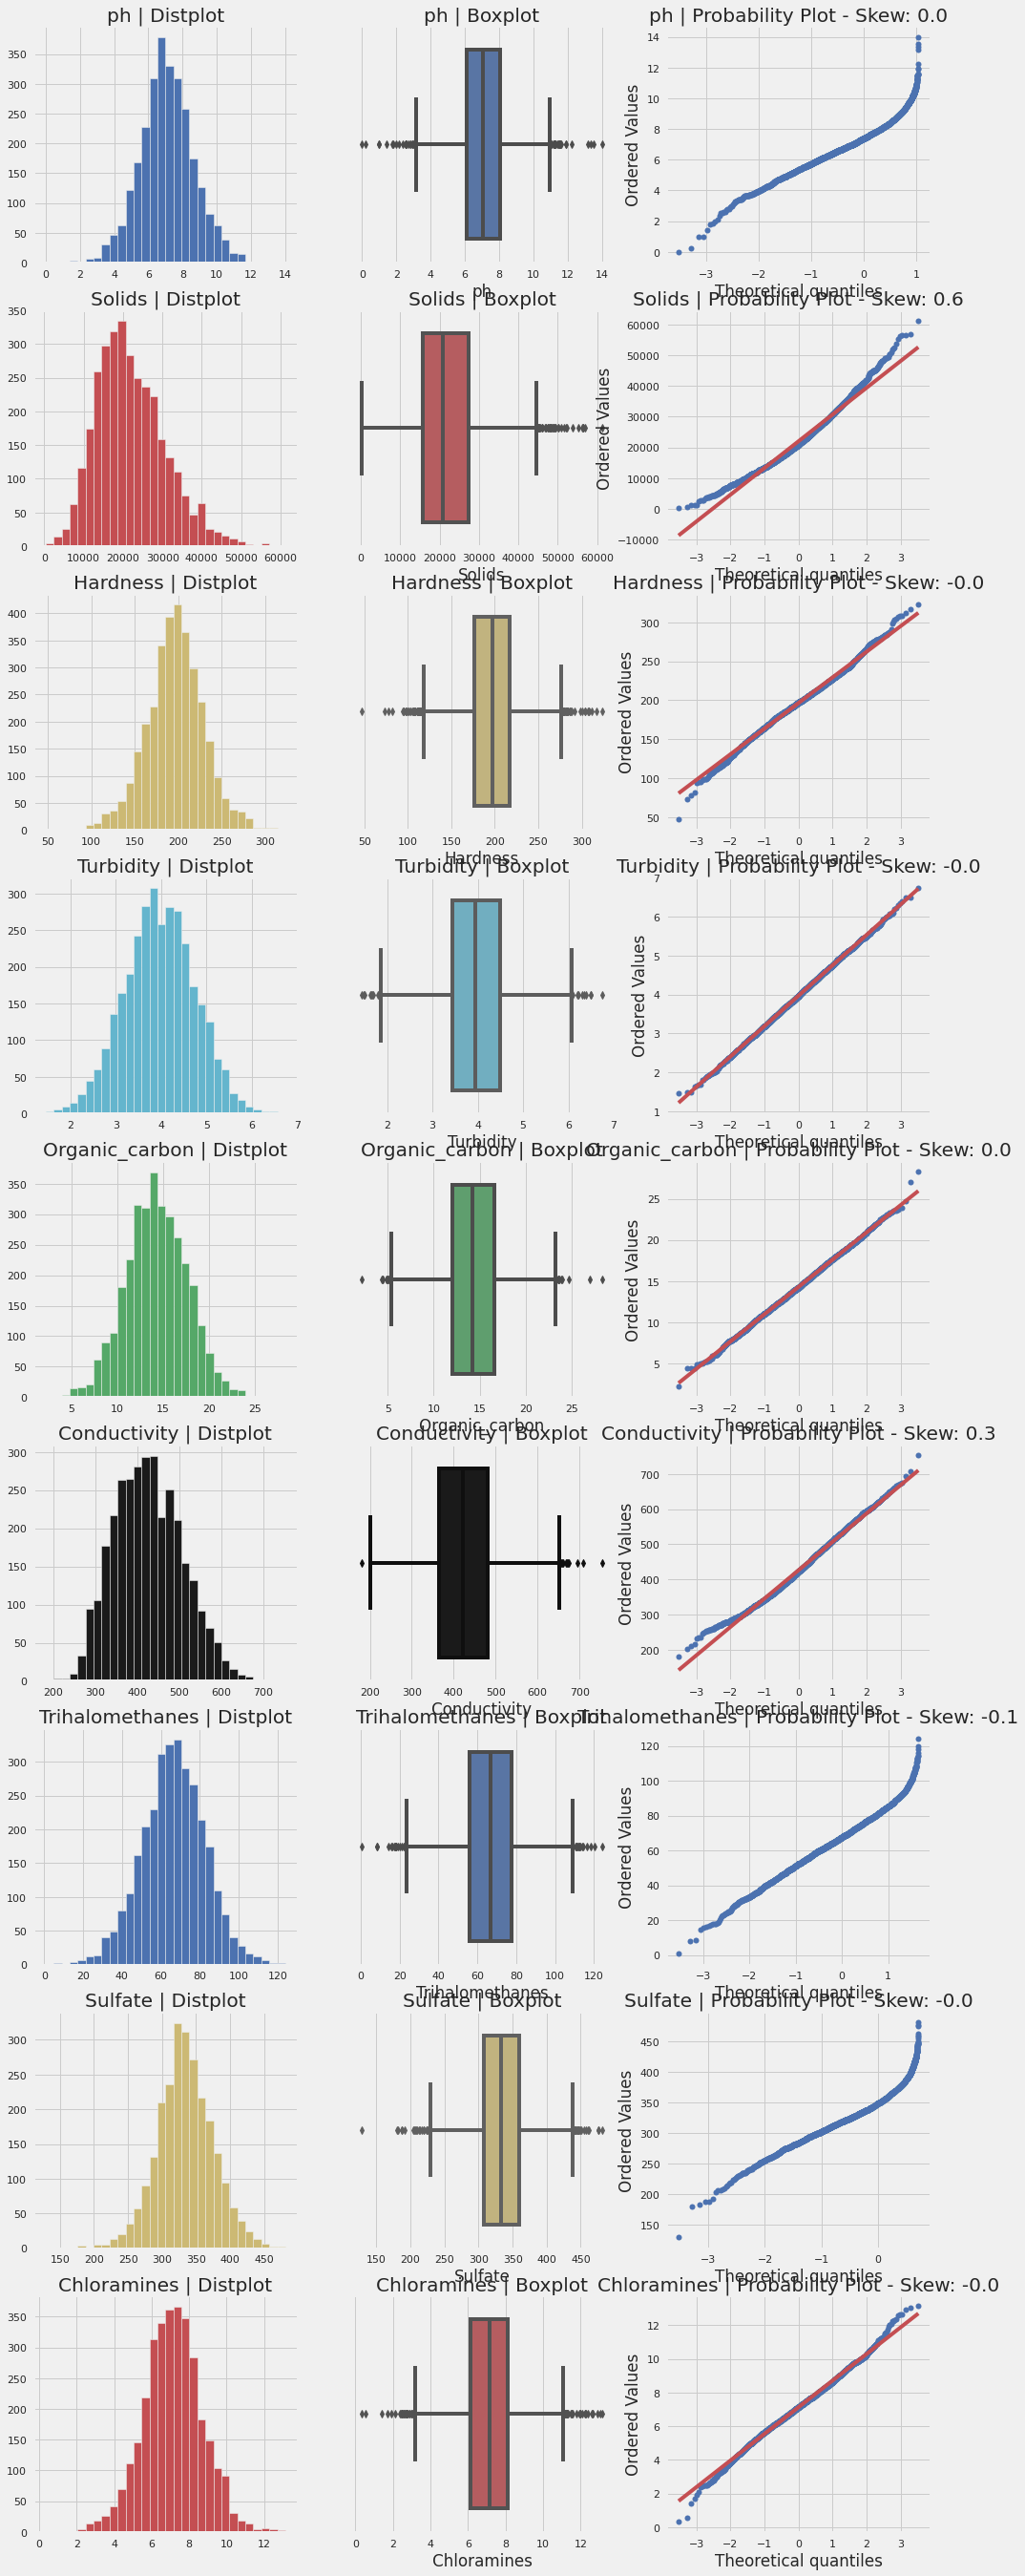

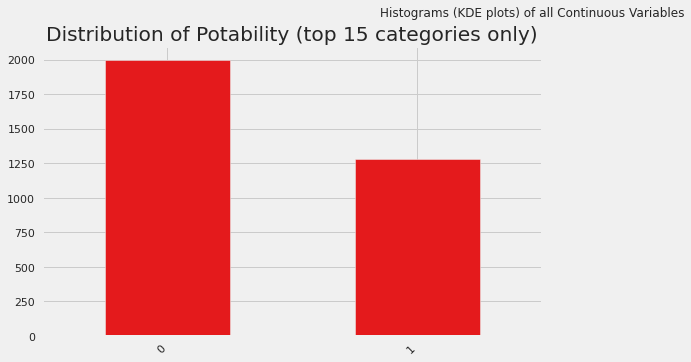

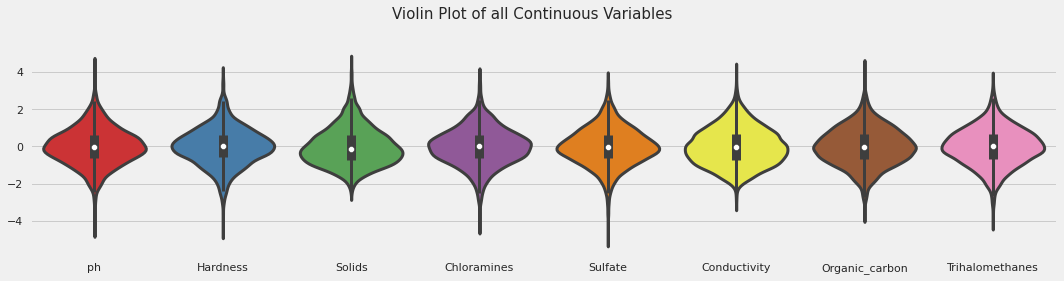

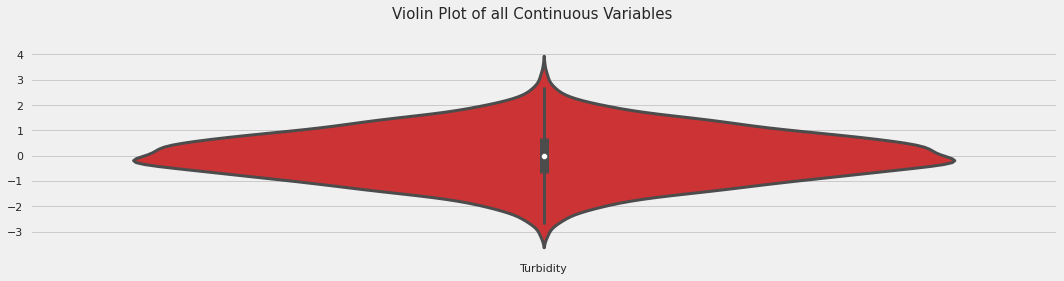

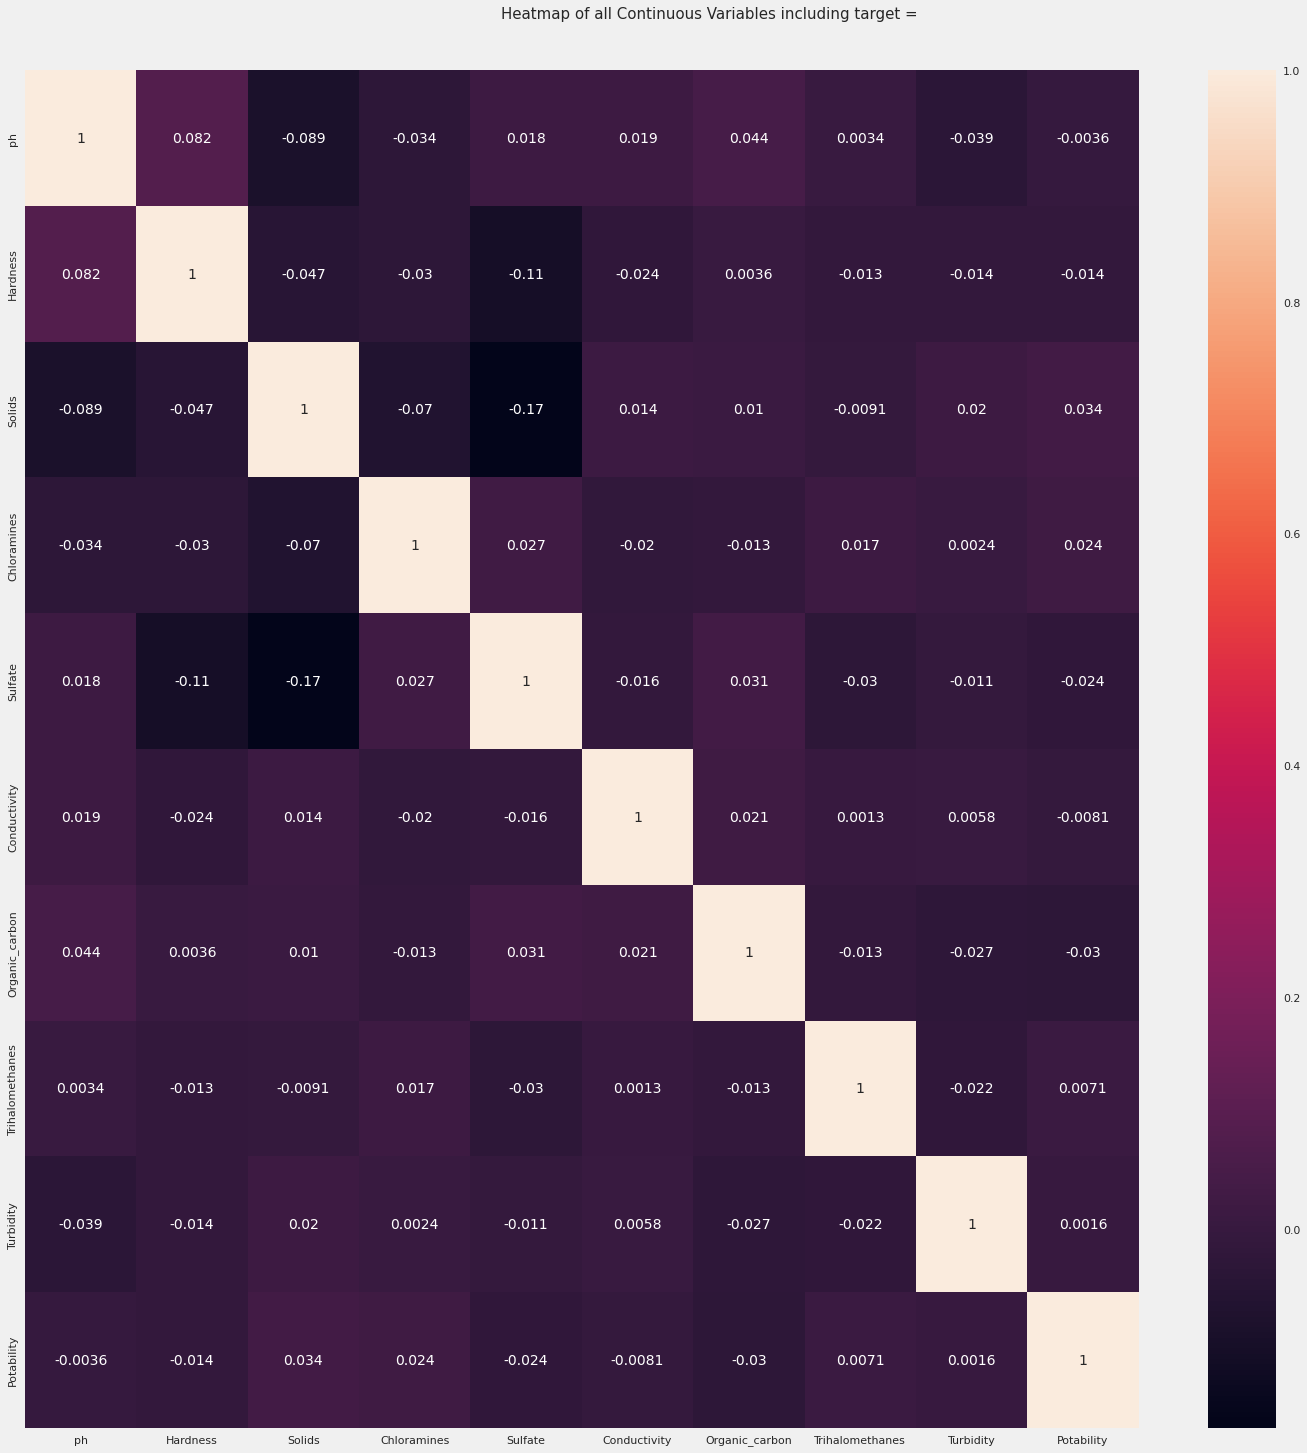

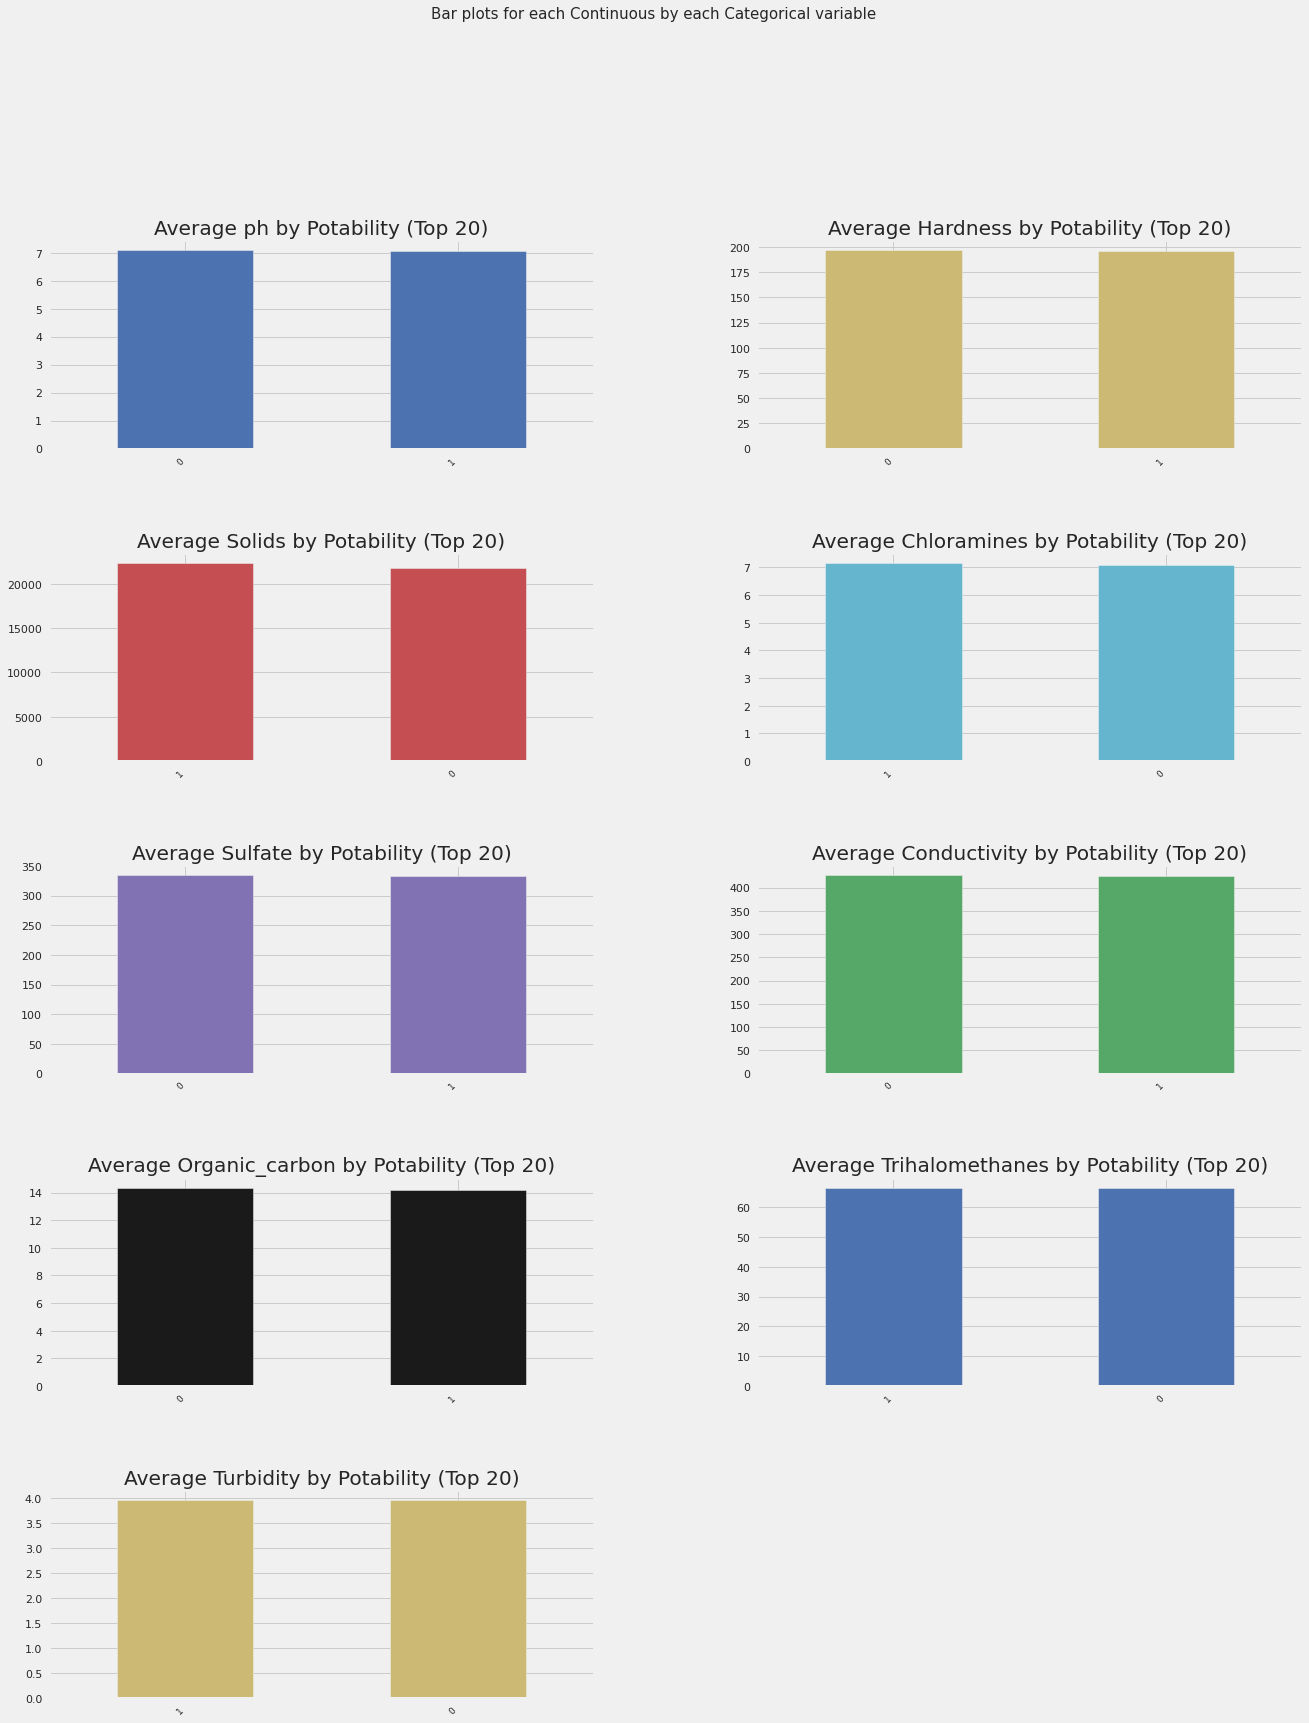

In [44]:
filename = "water_potability.csv"
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

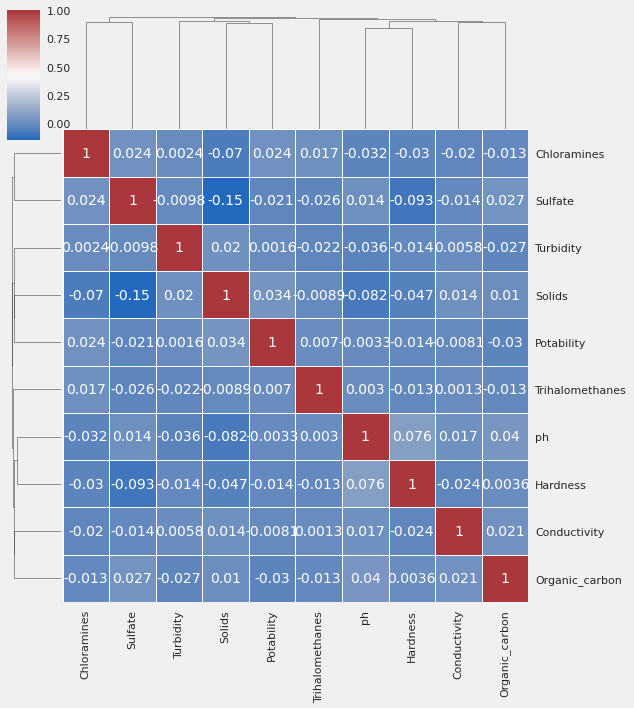

In [45]:
sns.clustermap(df.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .8, figsize = (9,10))
plt.show()

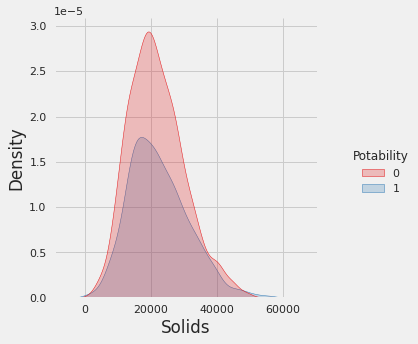

In [46]:
sns.displot(x=df['Solids'],hue=df['Potability'],kind='kde',fill=True)

In [47]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

vars = ['ph','Hardness', 'Chloramines', 'Solids', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
fig = make_subplots(rows=1, cols=len(vars))
for i, var in enumerate(vars):
    fig.add_trace(
        go.Box(y=df[var],
        name=var),
        row=1, col=i+1
    )

fig.update_traces(boxpoints='all', jitter=.3)

FEATURE SELECTION 